## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.decomposition import PCA
from PIL import Image
from IPython.display import display
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,cross_validate
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Visualization of data1.csv using scatterplot')

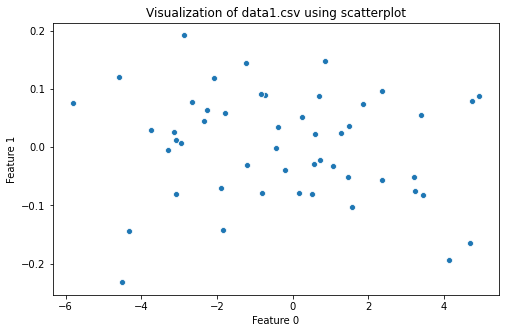

In [122]:
# Importing "data1.csv"
data1 = pd.read_csv("data1.csv",header=None)

#Scatterplot of data1
plt.figure(figsize = (8,5))
sns.scatterplot(data = data1,x = 0, y = 1)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Visualization of data1.csv using scatterplot")

In [123]:
data1

,0,1
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519
5,-4.326320,-0.143142
6,4.123034,-0.194022
7,-2.652204,0.077234
8,0.499932,-0.079527
9,-0.838980,0.092056


**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [124]:
def RepLoss(X,r):
    (n,m) = X.shape
    M = np.inf
    X_new = X.copy()
    comb = list(combinations(list(range(m)),r))
    for features in comb:
        for ft in features:
            del X_new[ft]
        loss = np.sum(np.sum(X_new**2))
        if loss<M:
            M = loss
            best_rep = X[list(features)]
            rep_feat = features
        X_new = X.copy()
    return best_rep,rep_feat,M

In [125]:
best_rep,rep_feat,loss = RepLoss(data1,1)

print("Feature %d"%rep_feat[0] + " is the best single-feature representation of the data, with the minimum representation loss of %f"%loss)

print("\nBest single-feature representation")
print(best_rep)

Feature 0 is the best single-feature representation of the data, with the minimum representation loss of 0.419127

Best single-feature representation
           0
0  -3.086760
1   2.368870
2  -0.741769
3  -1.221298
4  -2.080397
5  -4.326320
6   4.123034
7  -2.652204
8   0.499932
9  -0.838980
10 -2.858644
11 -2.267901
12  4.917435
13  1.283584
14  0.710533
15  3.442049
16  1.558618
17 -1.207792
18 -0.434896
19  3.233355
20 -2.336237
21  4.675850
22  3.196917
23 -1.884340
24  1.071762
25 -1.795013
26  1.452185
27 -5.808152
28 -3.093698
29 -3.743410
30  4.738467
31  0.580810
32 -0.385729
33 -3.283418
34  0.561406
35  0.689401
36  3.386773
37 -2.955412
38  2.350010
39 -0.812667
40  0.247852
41  1.499923
42 -1.841450
43 -3.124917
44 -4.578724
45 -0.202483
46  1.868510
47  0.866679
48 -4.508619
49  0.170737


**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

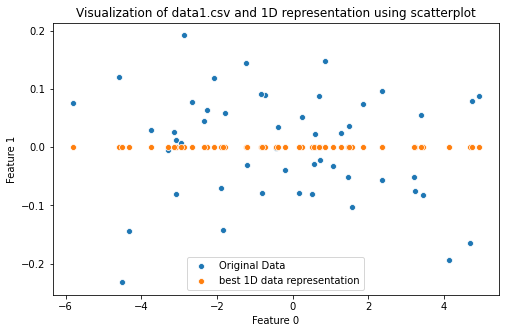

In [128]:
#Scatterplot of data1
plt.figure(figsize = (8,5))
sns.scatterplot(data = data1,x = 0, y = 1)

plt.title("Visualization of data1.csv and 1D representation using scatterplot")

sns.scatterplot(data = pd.DataFrame(np.hstack((np.array(best_rep),np.zeros((data1.shape[0],1))))),x=0,y=1)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Original Data","best 1D data representation"])

**(2a) Load the data file 'data2.csv'.**

In [97]:
# Importing "data1.csv"
data2 = pd.read_csv("data2.csv",header=None)

**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

Text(0.5, 1.0, 'Minimum Representational loss vs Number of features \nchosen to be represented')

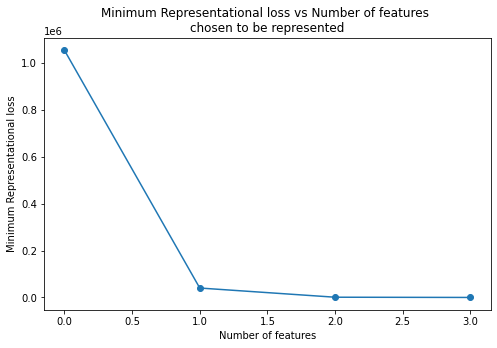

In [98]:
loss_values = []
selected_features = {}
for r in [0,1,2,3]:
    best_rep,rep_feat,loss = RepLoss(data2,r)
    selected_features[r] = rep_feat
    loss_values.append(loss)

plt.figure(figsize = (8,5))
plt.plot(list(range(4)),loss_values,"-o")
plt.ylabel("Minimum Representational loss")
plt.xlabel("Number of features")
plt.title("Minimum Representational loss vs Number of features \nchosen to be represented")

In [119]:
print("Selected Features in 'k' feature representation (0<=k<=3)")
selected_features

Selected Features in 'k' feature representation (0<=k<=3)


{0: (), 1: (2,), 2: (1, 2), 3: (0, 1, 2)}

**Hence, the order of importance of features in decreaseing order is [2,1,0,3]**.

Explanation: When only one feature was considered, feature 2 gave the lowest representation loss, making it the most important feature. When 2 features were considered, features 1 and 2 were selected, making feature 1 the next important feature. Similarly, the next important feature is 0, followed by the least important feature 3.

**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [118]:
#Computing Covariance matrix of data2
print("Covariance Matrix of Data2 = ")
cov_matrix_data2 = pd.DataFrame(np.cov(data2.T))
data2.cov()

Covariance Matrix of Data2 = 


,0,1,2,3
0,0.987196,-0.057179,-0.140991,0.003057
1,-0.057179,39.182190,0.116676,-0.007770
2,-0.140991,0.116676,1008.989796,0.055835
3,0.003057,-0.007770,0.055835,0.005093


**The diagonal values of the covariance matrix represent the variance of the individual features. It can be noticed that higher the importance of the feature, higher the variance of the feature.**

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

Text(0.5, 1.0, 'Visualization of data3.csv using scatterplot')

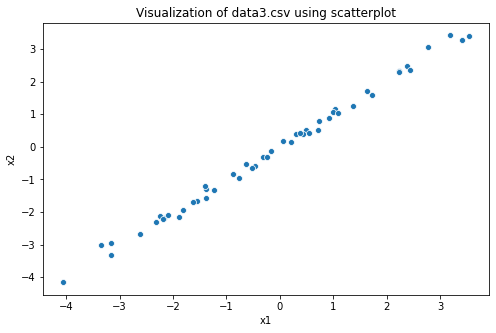

In [129]:
# Importing "data3.csv"
data3 = pd.read_csv("data3.csv",header=None)
(m,n) = data3.shape

#Scatterplot of data3
plt.figure(figsize = (8,5))
sns.scatterplot(data = data3,x = 0, y = 1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualization of data3.csv using scatterplot")

In [130]:
#Covariance Matrix of Data
print("Covariance Matrix of Data3 = ")
cov_matrix_data3 = data3.cov()
cov_matrix_data3

Covariance Matrix of Data3 = 


,0,1
0,3.594166,3.617564
1,3.617564,3.658059


**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

In [131]:
# Eigenvalue decomosition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix_data3)
print("EigenValues")
print(eig_vals.reshape(-1,1))
print()
print("Eigenvector Matrix")
print(eig_vecs)

EigenValues
[[0.00840733]
 [7.24381702]]

Eigenvector Matrix
[[-0.710222   -0.70397777]
 [ 0.70397777 -0.710222  ]]


**We consider the eigenvector corresponding to maximum eigenvalue (7.2438), i.e., the second column of the eigenvector matrix**

In [132]:
#Computing A*V
PC1 = eig_vecs[:,1].reshape(-1,1)
Proj = np.dot(data3,PC1)
Proj

array([[ 3.08678638],
       [-2.36909893],
       [ 0.74215669],
       [ 1.22192751],
       [ 2.08089966],
       [ 4.32564629],
       [-4.12385028],
       [ 2.6525189 ],
       [-0.50027851],
       [ 0.83937823],
       [ 2.85946339],
       [ 2.26816436],
       [-4.91700252],
       [-1.28346178],
       [-0.71062164],
       [-3.44238144],
       [-1.55905734],
       [ 1.20764729],
       [ 0.43488617],
       [-3.23365407],
       [ 2.33641202],
       [-4.67652913],
       [-3.19711442],
       [ 1.88400972],
       [-1.07189102],
       [ 1.79525097],
       [-1.45239425],
       [ 5.80842753],
       [ 3.09331425],
       [ 3.74350283],
       [-4.73807159],
       [-0.58070542],
       [ 0.38587793],
       [ 3.28336676],
       [-0.56152929],
       [-0.68900798],
       [-3.38649476],
       [ 2.95541181],
       [-2.34956476],
       [ 0.8123097 ],
       [-0.24761695],
       [-1.49974651],
       [ 1.84080837],
       [ 3.12500313],
       [ 4.57921448],
       [ 0

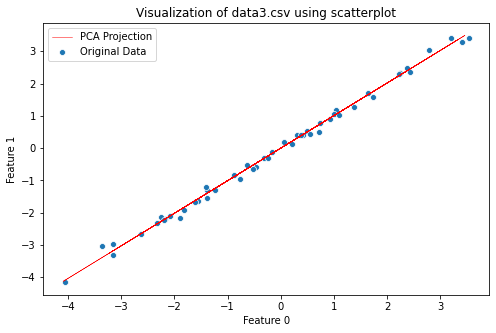

In [144]:
x_new = Proj*PC1[0]
y_new = Proj*PC1[1]

plt.figure(figsize = (8,5))
sns.scatterplot(data = data3,x = 0, y = 1)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Visualization of data3.csv using scatterplot")
plt.plot(x_new,y_new,"-r",linewidth =0.5)
plt.legend(["PCA Projection","Original Data"])

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [108]:
#Computing representation loss after PCA with the original data
data_PCA = np.hstack((x_new,y_new))
rep_loss = np.sum(np.sum((data3-data_PCA)**2))
print("Representation Loss with 1 PC = %f"%rep_loss)

Representation Loss with 1 PC = 0.412025


In [110]:
#Computing one-dimensional feature representation loss
best_rep_data3,rep_feat_data3,loss_data3 = RepLoss(data3,1)
print("Feature %d"%rep_feat_data3[0] + " is the best single-feature representation of the data3, with the minimum representation loss of %f"%loss_data3)

Feature 1 is the best single-feature representation of the data3, with the minimum representation loss of 177.667496


**As observed in the covariance matrix, the variance of both the features are equally high and moreover, the linear covariance of the two features is also high. In such a case the representation loss when only one of the features is chosen to be represented will be much higher than the loss obtained after PCA, as shown in the results above. The PCA loss is 0.412 and 1-feature loss is 177.667.**

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [136]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

Original Image 0


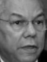

Reconstructed Image 0


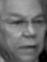

Data 0 Loss = 9339.867397

Original Image 1


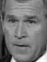

Reconstructed Image 1


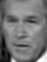

Data 1 Loss = 9166.798732

Original Image 2


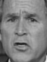

Reconstructed Image 2


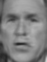

Data 2 Loss = 9149.096677

Original Image 3


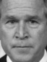

Reconstructed Image 3


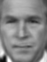

Data 3 Loss = 9064.287065

Original Image 4


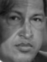

Reconstructed Image 4


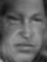

Data 4 Loss = 9338.963915

Original Image 5


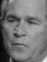

Reconstructed Image 5


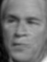

Data 5 Loss = 9131.892849

Original Image 6


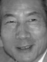

Reconstructed Image 6


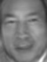

Data 6 Loss = 9302.515681

Original Image 7


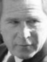

Reconstructed Image 7


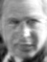

Data 7 Loss = 9192.785432

Original Image 8


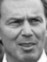

Reconstructed Image 8


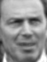

Data 8 Loss = 9018.762831

Original Image 9


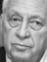

Reconstructed Image 9


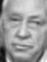

Data 9 Loss = 9217.250024



In [143]:
#Storing the data matrix
image_data = faces['data']

#Performing PCA Transformation - 150 components
pca = PCA(n_components=150)
data_reduced = pca.fit_transform(image_data)
#Reconstructing Matrix using 150 features
recons = pca.inverse_transform(data_reduced)

#Displaying the first 10 Original and Reconstructed Image
for i in range(10):
    print("Original Image %d"%i)
    im = Image.fromarray(faces['images'][i,:,:])
    im = im.convert("L")
    display(im)
    print("Reconstructed Image %d"%i)
    im_rec = Image.fromarray(recons[i,:].reshape(62,47))
    im_rec = im_rec.convert("L")
    display(im_rec)
    los = np.linalg.norm((np.array(im)-np.array(im_rec)),"fro")
    print("Data %d"%i+" Loss = %f"%los)
    print()

**It can be noticed that the reconstructed image obtained using PCA is a compressed version of the original image, and not all characterisitcs of the original image are retained in the compressed image. However, the compressed image serves as a reasonable approximation of the original image, making recognition equally easy.**

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [157]:
# Importing "data4.csv"
X_train = pd.DataFrame(np.genfromtxt("data_X.txt"))
#removing the last column as it contains labels
del X_train[13]
y_train = pd.read_csv("data_y.txt",sep = " ",header = None).astype(float)

#Standardizing the data as the columns have different scales
X_train = (X_train - np.mean(X_train))/np.std(X_train)

In [158]:
#polynomial transformation
poly = PolynomialFeatures(degree = 3,include_bias = False)
X_train_poly = poly.fit_transform(X_train)
#Regularization parameter values to be tried
lambda_vals = [10,100,1000]

#k-fold splitting
kf = KFold(n_splits=5,shuffle=True,random_state=0)
kf.get_n_splits(X_train)

for lam in lambda_vals:
    avg_mse = 0
    rid = Ridge(alpha=lam,max_iter=1000)
    for train_index, val_index in kf.split(X_train):
        #rid = Ridge(alpha=lam,max_iter=1000)
        rid.fit(X_train_poly[train_index],np.array(y_train)[train_index])
        mse_val = np.sum((rid.predict(X_train_poly[val_index]) - np.array(y_train)[val_index])**2)/len(val_index)
        avg_mse += mse_val/5
    
    print("Model with Regularization Parameter lambda = %d"%lam)
    print("Average Validation Mean Squared Error: %f"%avg_mse,end="\n\n")
    

Model with Regularization Parameter lambda = 10
Average Validation Mean Squared Error: 30.515428

Model with Regularization Parameter lambda = 100
Average Validation Mean Squared Error: 11.892782

Model with Regularization Parameter lambda = 1000
Average Validation Mean Squared Error: 16.951977



**As the model with regularization parameter $\lambda = 100$ gives the highest validation MSE, we can consider that as the best model. Since we are using polynomial tranformation on features of the data matrix, it results in a more complex model. In order to prevent overfitting, a higher value of $\lambda$ is preferred, i.e., the parameter weights should be penalized to a reasonably greater extent. However, making $\lambda$ too high, like 1000, underfits both the training and validation set, resulting in higher MSE.**